<div class="alert alert-warning">
    
<b>Disclaimer:</b> 
    
The main objective of the <i>Jupyter</i> notebooks is to show how to use the models of the <i>QENS library</i> by
    
- building a fitting model: composition of models, convolution with a resolution function  
- setting and running the fit  
- extracting and displaying information about the results  

These steps have a minimizer-dependent syntax. That's one of the reasons why different minimizers have been used in the notebooks provided as examples.  
But, the initial guessed parameters might not be optimal, resulting in a poor fit of the reference data.

</div>

# Jump sites log norm diffusion with scipy

## Introduction

<div class="alert alert-info">
    
The objective of this notebook is to show how to use one of the models of 
the <a href="https://github.com/QENSlibrary/QENSmodels">QENSlibrary</a>, <b>sqwJumpSitesLogNormDist</b>, to perform some fits. 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html">scipy.optimize.curve_fit</a> is used for fitting.
</div>

### Physical units

For information about unit conversion, please refer to the jupyter notebook called `Convert_units.ipynb` in the `tools` folder.

The dictionary of units defined in the cell below specify the units of the refined parameters adapted to the convention used in the experimental datafile.

In [1]:
# Units of parameters for selected QENS model and experimental data

dict_physical_units = {'scale': "unit_of_signal.ps", 
                       'center': "1/ps", 
                       'radius': 'Angstrom', 
                       'resTime': 'ps'}

## Importing libraries

In [2]:
# import python modules for plotting, fitting
from __future__ import print_function
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# for interactivity (plots, buttons...)
import ipywidgets

# import model from QENS library
import QENSmodels

## Plot of the fitting model

The widget below shows the peak shape function imported from QENSmodels where the function's parameters can be varied.

In [3]:
# Dictionary of initial values
ini_parameters = {'q': 1., 'scale': 5., 'center': 5., 'Nsites': 3, 'radius': 1., 'resTime':1., 'sigma': 1.}

def interactive_fct(q, scale, center, Nsites, radius, resTime, sigma):
    xs = np.linspace(-10, 10, 100)
    fig1, ax1 = plt.subplots()
    ax1.plot(xs, QENSmodels.sqwJumpSitesLogNormDist(xs, q, scale, center, Nsites, radius, resTime, sigma))
    ax1.set_xlabel('x')
    ax1.grid()

# Define sliders for modifiable parameters and their range of variations
q_slider = ipywidgets.FloatSlider(value=ini_parameters['q'],
                                  min=0.1, max=10., step=0.1,
                                  description='q', 
                                  continuous_update=False) 

scale_slider = ipywidgets.FloatSlider(value=ini_parameters['scale'],
                                      min=0.1, max=10, step=0.1,
                                      description='scale',
                                      continuous_update=False) 

center_slider = ipywidgets.IntSlider(value=ini_parameters['center'],
                                     min=-10, max=10, step=1,
                                     description='center', 
                                     continuous_update=False) 

Nsites_slider = ipywidgets.IntSlider(value=ini_parameters['Nsites'],
                                     min=2, max=10, step=1,
                                     description='Nsites',
                                     continuous_update=False)

radius_slider = ipywidgets.FloatSlider(value=ini_parameters['radius'],
                                       min=0.1, max=10, step=0.1,
                                       description='radius',
                                       continuous_update=False)

resTime_slider = ipywidgets.FloatSlider(value=ini_parameters['resTime'],
                                        min=0.1, max=10, step=0.1,
                                        description='resTime', 
                                        continuous_update=False)

sigma_slider = ipywidgets.FloatSlider(value=ini_parameters['sigma'],
                                        min=0.1, max=10, step=0.1,
                                        description='sigma', 
                                        continuous_update=False)

grid_sliders = ipywidgets.HBox([ipywidgets.VBox([q_slider, scale_slider, center_slider, Nsites_slider])
                                ,ipywidgets.VBox([radius_slider, resTime_slider, sigma_slider])])
                              
# Define function to reset all parameters' values to the initial ones
def reset_values(b):
    """Reset the interactive plots to inital values."""
    q_slider.value = ini_parameters['q'] 
    scale_slider.value = ini_parameters['scale'] 
    center_slider.value = ini_parameters['center']  
    Nsites_slider.value = ini_parameters['Nsites'] 
    radius_slider.value = ini_parameters['radius'] 
    resTime_slider.value = ini_parameters['resTime']
    sigma_slider.value = ini_parameters['slider']

# Define reset button and occurring action when clicking on it
reset_button = ipywidgets.Button(description = "Reset")
reset_button.on_click(reset_values)

# Display the interactive plot
interactive_plot = ipywidgets.interactive_output(interactive_fct,       
                                         {'q': q_slider, 
                                          'scale': scale_slider,
                                          'center': center_slider,
                                          'Nsites': Nsites_slider,
                                          'radius': radius_slider,
                                          'resTime': resTime_slider,
                                          'sigma': sigma_slider})  
                                            
display(grid_sliders, interactive_plot, reset_button)

Output()

Button(description='Reset', style=ButtonStyle())

## Creating reference data

**Input:** the reference data for this simple example correspond to sqwJumpSitesLogNormDist with added noise.

The fit is performed using `scipy.optimize.curve_fit`. <br> The example is based on implementations from https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

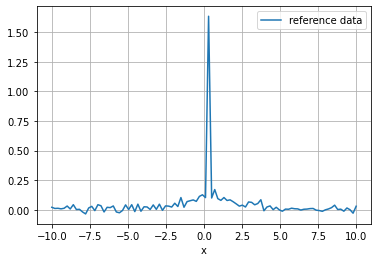

In [4]:
# Creation of reference data
nb_points = 100
xx = np.linspace(-10, 10, nb_points)
added_noise = np.random.normal(0, 1, nb_points)
sqw_jump_sites_noisy = QENSmodels.sqwJumpSitesLogNormDist(xx, q=0.89, scale=1, center=0.3, Nsites=5, radius=2, resTime=0.45, sigma=0.25)*(1. + 0.04*added_noise) + 0.02*added_noise

fig0, ax0 = plt.subplots()
ax0.plot(xx, sqw_jump_sites_noisy, label='reference data')
ax0.set_xlabel('x')
ax0.grid()
ax0.legend();

## Setting and fitting

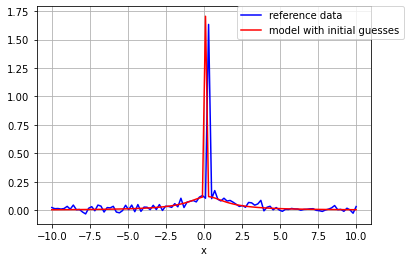

In [5]:
# From https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# perform fit with initial guesses scale=0.95, center=0.2, radius=2, resTime=0.45, sigma=0.25
# Nsites=5 and q =0.89 are fixed

def func_to_fit(xx, scale, center, radius, resTime, sigma):
    return QENSmodels.sqwJumpSitesLogNormDist(xx, 0.89, scale, center, 5, radius, resTime, sigma)

fig0, ax0 = plt.subplots()
ax0.plot(xx, sqw_jump_sites_noisy, 'b-', label='reference data')
ax0.plot(xx, QENSmodels.sqwJumpSitesLogNormDist(xx, 0.89, scale=0.95, center=0.2, Nsites=5, radius=2, resTime=0.45, sigma=0.25), 'r-', label='model with initial guesses')
ax0.set_xlabel('x')
ax0.grid()
ax0.legend(bbox_to_anchor=(0.6, 1), loc=2, borderaxespad=0.);

In [6]:
success_fit = True

try:
    popt, pcov = curve_fit(func_to_fit, xx, sqw_jump_sites_noisy, p0=[0.95, 0.2, 2, 0.45, 0.25], 
                       bounds=((0.1, -2, 0.1, 0.1, 0.1), (5., 2., 5., 11., 1.)))
    
except RuntimeError:
    success_fit = False
    print("Error - curve_fit failed")

## Plotting the results

In [7]:
# Calculation of the errors on the refined parameters:
if success_fit: 
    perr = np.sqrt(np.diag(pcov))
    print('Values of refined parameters:')
    print('scale:'  , popt[0],'+/-', perr[0], dict_physical_units['scale'])
    print('center :', popt[1],'+/-', perr[1], dict_physical_units['center'])
    print('radius'  , popt[2],'+/-', perr[2], dict_physical_units['radius'])
    print('resTime' , popt[3],'+/-', perr[3], dict_physical_units['resTime'])
    print('sigma'   , popt[4],'+/-', perr[4])

Values of refined parameters:
scale: 1.015765504244459 +/- 0.06717082484006974 unit_of_signal.ps
center : 0.4040403876589705 +/- 0.1142326093403423 1/ps
radius 2.1066202309311417 +/- 0.06300303456669253 Angstrom
resTime 0.4144134384949737 +/- 0.06506041194363285 ps
sigma 0.31055072036955667 +/- 0.4756821073430132


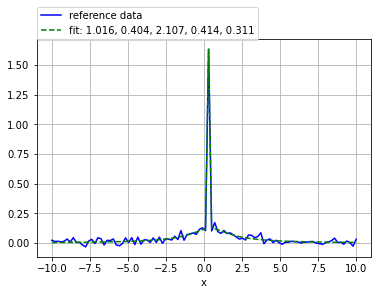

In [8]:
# Comparison of reference data with fitting result
if success_fit: 
    fig1, ax1 = plt.subplots()
    ax1.plot(xx, sqw_jump_sites_noisy, 'b-', label='reference data')
    ax1.plot(xx, func_to_fit(xx, *popt), 'g--', label='fit: %5.3f, %5.3f, %5.3f, %5.3f, %5.3f' % tuple(popt))
    ax1.legend(bbox_to_anchor=(0., 1.15), loc='upper left', borderaxespad=0.)
    ax1.set_xlabel('x')
    ax1.grid();